# **Praproses**

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn import model_selection #Library untuk proses prediksi
from sklearn.model_selection import KFold # Cross Validation
from sklearn.model_selection import cross_val_score # Mengambil nilai hasil tes
from sklearn.model_selection import cross_validate # Mengambil nilai hasil tes
from sklearn.model_selection import train_test_split # Repeated Hold Out
from sklearn.metrics import classification_report # Menampilkan hasil tes

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 40kB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seoul.xlsx to seoul.xlsx


In [ ]:
import io
data = pd.read_excel(io.BytesIO(uploaded['seoul.xlsx']))

In [ ]:
data.head(10)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
data.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [ ]:
datcop = data.copy()

In [ ]:
datcop.replace({'Holiday' : {'No Holiday': 0 , 'Holiday': 1}}, inplace=True)
datcop.head(10)

In [ ]:
datcop['KategoriHujan'] = 'str'
datcop['KategoriHujan'][(datcop['Rainfall']<0.1)&
                        (datcop['Rainfall']>=0)] = 'Tidak Hujan'
datcop['KategoriHujan'][(datcop['Rainfall']<5)&
                        (datcop['Rainfall']>=0.1)] = 'Hujan Rintik'
datcop['KategoriHujan'][(datcop['Rainfall']<10)&
                        (datcop['Rainfall']>=5)] = 'Hujan'
datcop['KategoriHujan'][datcop['Rainfall']>=10] = 'Hujan Deras'
datcop

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0


In [ ]:
datcop = datcop.rename(columns = {"Functioning Day":"FunctioningDay"})

In [ ]:
datcop.Date = datcop.Date.astype(str)

In [ ]:
datcop["weekday"] = datcop.Date.apply(lambda DateString : calendar.day_name[datetime.strptime(DateString,"%Y-%m-%d").weekday()])

In [ ]:
datcop["weekday"] = datcop.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
datcop["month"] = [t.month for t in pd.DatetimeIndex(datcop.Date)]
datcop['year'] = [t.year for t in pd.DatetimeIndex(datcop.Date)]
datcop['year'] = datcop['year'].map({2017:0, 2018:1})
datcop.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0


In [ ]:
datcop['Count'] = 'str'
datcop['Count'][(datcop['Rented Bike Count']<1000)&
                        (datcop['Rented Bike Count']>=0)] = '0'
datcop['Count'][(datcop['Rented Bike Count']<2000)&
                        (datcop['Rented Bike Count']>=1000)] = '1'
datcop['Count'][datcop['Rented Bike Count']>=2000] = '2'
datcop

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0


In [ ]:
datcop.Count = datcop.Count.astype(int)

In [ ]:
datafs = datcop.copy()

In [ ]:
datafs = datafs.join(pd.get_dummies(datafs['weekday']))
datafs

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,1,1,0,0,0,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Yes,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0


In [ ]:
datafs.replace({'FunctioningDay' : {'No': "NoFunc" , 'Yes': "Func"}}, inplace=True)
datafs = datafs.join(pd.get_dummies(datafs['FunctioningDay']))
datafs

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Func,NoFunc
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,1,1,0,0,0,0,0,0,1,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
datafs = datafs.join(pd.get_dummies(datafs['Seasons']))
datafs

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Func,NoFunc,Autumn,Spring,Summer,Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Func,Tidak Hujan,Friday,12,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,Func,Tidak Hujan,Friday,11,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
datacop = datcop.copy()

In [ ]:
datacop['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
datacop.replace({'Seasons' : {'Winter': 1 , 'Spring': 2, 'Summer': 3, 'Autumn': 4}}, inplace=True)
datacop

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,Yes,Tidak Hujan,Friday,12,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,Yes,Tidak Hujan,Friday,12,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,Yes,Tidak Hujan,Friday,12,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,Yes,Tidak Hujan,Friday,12,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,Yes,Tidak Hujan,Friday,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,Yes,Tidak Hujan,Friday,11,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,Yes,Tidak Hujan,Friday,11,1,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,Yes,Tidak Hujan,Friday,11,1,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,Yes,Tidak Hujan,Friday,11,1,0


In [ ]:
datacop.replace({'FunctioningDay' : {'No': 0 , 'Yes': 1}}, inplace=True)
datacop.head(10)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,KategoriHujan,weekday,month,year,Count
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,1,0,1,Tidak Hujan,Friday,12,0,0


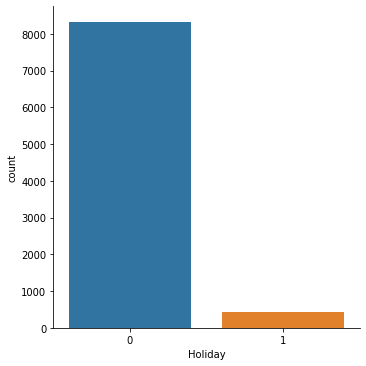

In [ ]:
datcop.Holiday.value_counts()
sns.catplot(x='Holiday',data=datcop,kind='count',height=5,aspect=1)

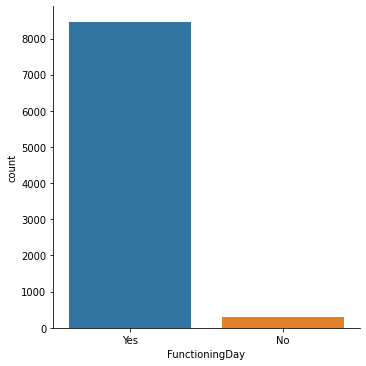

In [ ]:
datcop.FunctioningDay.value_counts()
sns.catplot(x='FunctioningDay',data=datcop,kind='count',height=5,aspect=1)

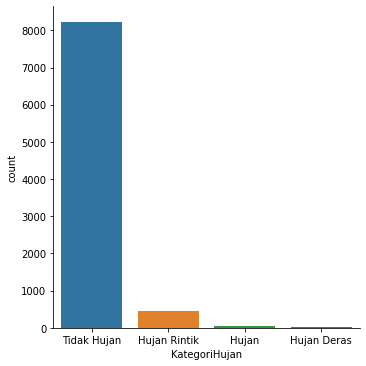

In [ ]:
sns.catplot(x='KategoriHujan',data=datcop,kind='count',height=5,aspect=1)

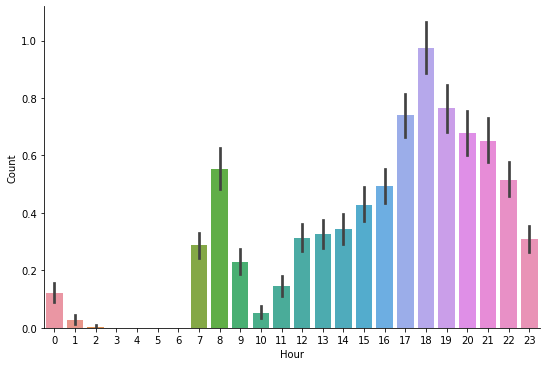

In [ ]:
sns.factorplot(x="Hour",y="Count",data=datcop,kind='bar',size=5,aspect=1.5)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

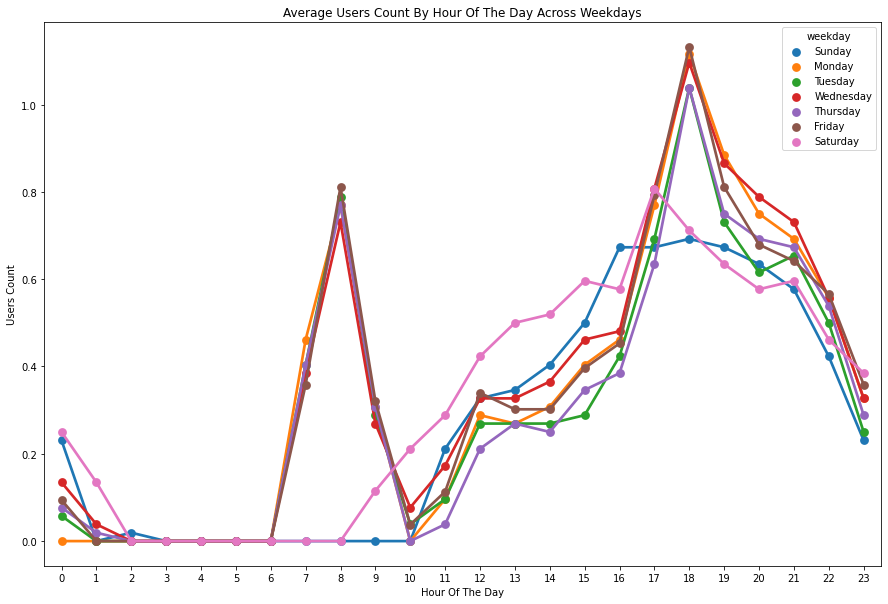

In [ ]:
fig,(ax3)= plt.subplots(nrows=1)
fig.set_size_inches(15,10)
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(datcop.groupby(["Hour","weekday"],sort=True)["Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

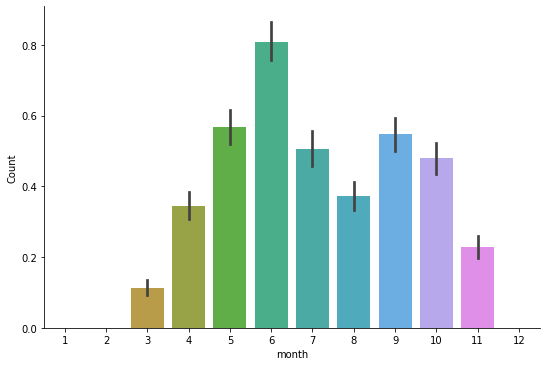

In [ ]:
sns.factorplot(x="month",y="Count",data=datcop,kind='bar',size=5,aspect=1.5)

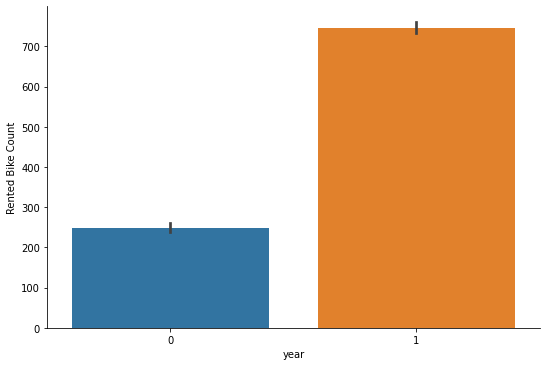

In [ ]:
sns.factorplot(x="year",y="Rented Bike Count",data=datcop,kind='bar',size=5,aspect=1.5)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

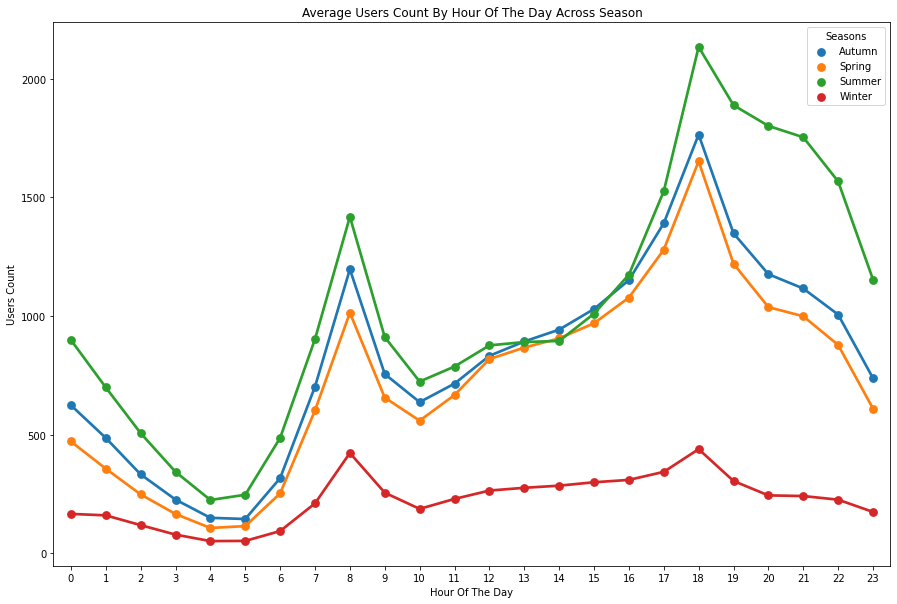

In [ ]:
fig,(ax2)= plt.subplots(nrows=1)
fig.set_size_inches(15,10)

hourAggregated = pd.DataFrame(datcop.groupby(["Hour","Seasons"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Rented Bike Count"],hue=hourAggregated["Seasons"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
#1 = spring, 2 = summer, 3 = fall, 4 = winter

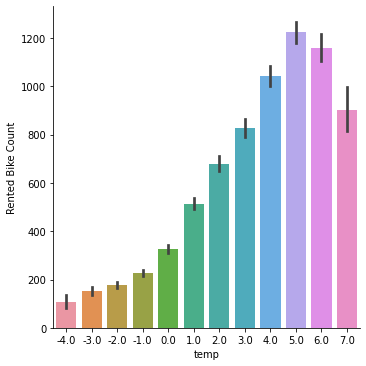

In [ ]:
datatemp=datcop.copy()
datatemp.Temperature.describe()
datatemp['temp']=np.floor(datatemp['Temperature'])//5
datatemp['temp'].unique()
sns.factorplot(x="temp",y="Rented Bike Count",data=datatemp,kind='bar')
#temp 5.0 = 25-30c

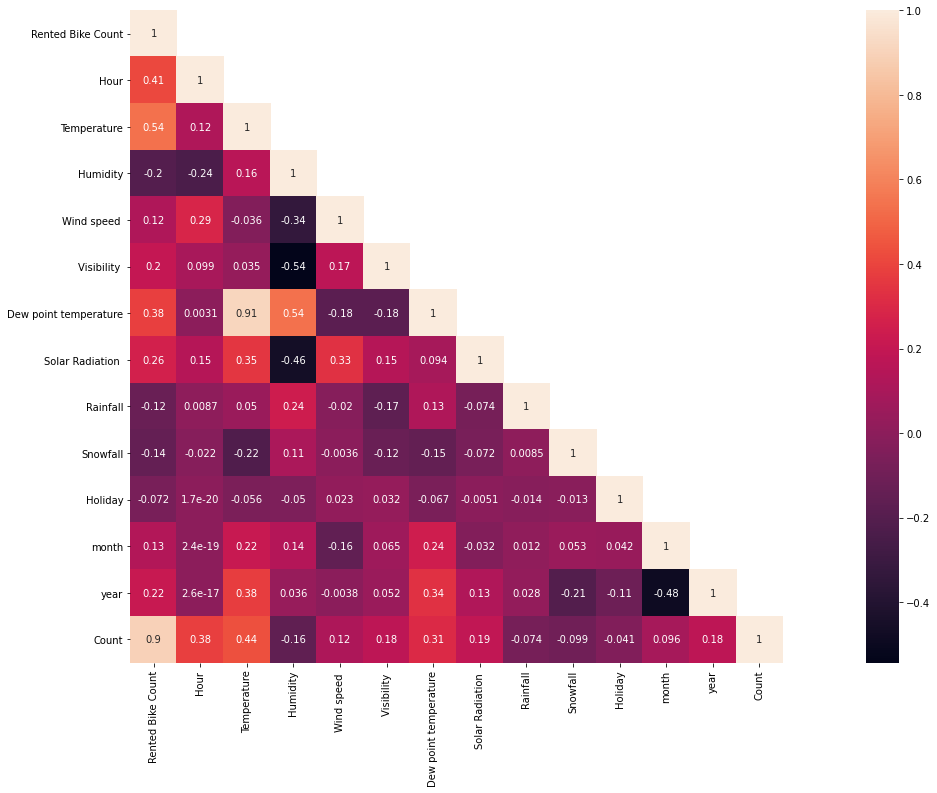

In [ ]:
cor_mat= datcop[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# **KNN**

In [ ]:
# Classification Process
from sklearn.neighbors import KNeighborsClassifier # Library for KNN

fitur = ["Hour", "Temperature", "Humidity", "Wind speed ", "Visibility ", "Dew point temperature", "Solar Radiation ", "Rainfall", "Snowfall", "Seasons", "Holiday", "FunctioningDay"]
x = datacop[fitur]
y = datacop['Count']

knn = KNeighborsClassifier(n_neighbors=8)
kfold = model_selection.KFold(n_splits=10)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
result = cross_val_score(knn, x, y, cv=kfold, scoring="accuracy") * 100
print(result.mean())

77.95662100456623


In [ ]:
# Classification with train and split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
knn.fit(x_train, y_train)
score_test = knn.score(x_test, y_test)
predict = knn.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1277
           1       0.63      0.52      0.57       384
           2       0.47      0.18      0.26        91

    accuracy                           0.81      1752
   macro avg       0.65      0.54      0.57      1752
weighted avg       0.79      0.81      0.79      1752



In [ ]:
# Comparing the train and split size ration for KNN
neighbors = []
for i in range(1, 51):
  neighbors.append(i) 
split = [5, 10]
train_size = [0.8, 0.75, 0.7, 0.6]

score_data = []
score_data2 = []
score_data3 = []
score_data4 = []
for n in neighbors :
  for t in train_size :
    knn = KNeighborsClassifier(n_neighbors=n)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=t, random_state=42)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print("Accuracy KNN (K = %.f) with train size %.2f : %.3f%%" % (n, t, score*100))
    if t == 0.8: score_data.append(score*100)
    if t == 0.75: score_data2.append(score*100)
    if t == 0.7: score_data3.append(score*100)
    if t == 0.6: score_data4.append(score*100)

Accuracy KNN (K = 1) with train size 0.80 : 79.509%
Accuracy KNN (K = 1) with train size 0.75 : 79.361%
Accuracy KNN (K = 1) with train size 0.70 : 79.300%
Accuracy KNN (K = 1) with train size 0.60 : 78.282%
Accuracy KNN (K = 2) with train size 0.80 : 80.251%
Accuracy KNN (K = 2) with train size 0.75 : 79.726%
Accuracy KNN (K = 2) with train size 0.70 : 79.376%
Accuracy KNN (K = 2) with train size 0.60 : 79.224%
Accuracy KNN (K = 3) with train size 0.80 : 79.623%
Accuracy KNN (K = 3) with train size 0.75 : 79.269%
Accuracy KNN (K = 3) with train size 0.70 : 79.376%
Accuracy KNN (K = 3) with train size 0.60 : 79.110%
Accuracy KNN (K = 4) with train size 0.80 : 80.822%
Accuracy KNN (K = 4) with train size 0.75 : 80.457%
Accuracy KNN (K = 4) with train size 0.70 : 80.632%
Accuracy KNN (K = 4) with train size 0.60 : 80.736%
Accuracy KNN (K = 5) with train size 0.80 : 80.537%
Accuracy KNN (K = 5) with train size 0.75 : 80.320%
Accuracy KNN (K = 5) with train size 0.70 : 80.403%
Accuracy KNN

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

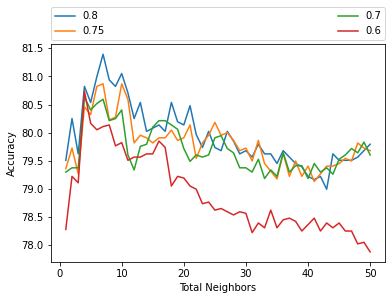

In [ ]:
# Comparing the KNN with the graphic
data_plot = pd.DataFrame({"total_n":neighbors, "acc":score_data})
data_plot2 = pd.DataFrame({"total_n":neighbors, "acc":score_data2})
data_plot3 = pd.DataFrame({"total_n":neighbors, "acc":score_data3})
data_plot4 = pd.DataFrame({"total_n":neighbors, "acc":score_data4})

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.plot(data_plot['total_n'], data_plot['acc'], label="0.8")
plt.plot(data_plot2['total_n'], data_plot2['acc'], label="0.75")
plt.plot(data_plot3['total_n'], data_plot3['acc'], label="0.7")
plt.plot(data_plot4['total_n'], data_plot4['acc'], label="0.6")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlabel('Total Neighbors')
plt.ylabel('Accuracy')
plt.show

**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
Actual = y_test.values.flatten()
predict = knn.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict))  

def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 
#tFinding the Standard Deviation
def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 
#Finding the Coefficient of Variation
def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 
arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.24444623992566705
Root Mean Squared Error - Test: 0.493681538228051
Mean Absolute Error - Test: 0.20833333333333334
Mean Squared Error - Test: 0.2437214611872146
Coefficient of Variation - Test: 175.85500000000002


**TRAIN**

In [ ]:
Actual = y_train.values.flatten()
predict = knn.predict(x_train)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict))  

def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 
def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 
def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 
arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.3980373960810746
Root Mean Squared Error - Test: 0.44871073555344454
Mean Absolute Error - Test: 0.1733732876712329
Mean Squared Error - Test: 0.20134132420091325
Coefficient of Variation - Test: 173.36499999999998


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
x = datafs[fitur]
y = datafs['Count']

naivebayes = GaussianNB()
kfold = model_selection.KFold()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
print(cross_val_score(naivebayes, x, y, cv=kfold, scoring="accuracy"))
result = cross_val_score(naivebayes, x, y, cv=kfold, scoring="accuracy")
print(result.mean()*100)

[1.         0.37100457 0.47659817 0.19805936 0.40810502]
49.07534246575342


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
naivebayes.fit(x_train, y_train)
score_test = naivebayes.score(x_test, y_test)
predict = naivebayes.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62      1277
           1       0.25      0.56      0.34       384
           2       0.23      0.78      0.35        91

    accuracy                           0.49      1752
   macro avg       0.49      0.60      0.44      1752
weighted avg       0.79      0.49      0.55      1752



In [ ]:
train_size = [0.9, 0.8, 0.75, 0.7, 2/3]
for t in train_size :
    naivebayes = GaussianNB()
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=t, random_state=42)
    naivebayes.fit(x_train, y_train)
    score = naivebayes.score(x_test, y_test)
    print("Accuracy Naive Bayes with train size %.2f : %.3f%%" % (t, score*100))

Accuracy Naive Bayes with train size 0.90 : 51.712%
Accuracy Naive Bayes with train size 0.80 : 49.258%
Accuracy Naive Bayes with train size 0.75 : 49.361%
Accuracy Naive Bayes with train size 0.70 : 48.478%
Accuracy Naive Bayes with train size 0.67 : 48.425%


**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
Actual = y_test.values.flatten()
predict = naivebayes.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)*10))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict)*10)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict)*10)  

def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 
def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 
def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 
arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: -1.043235450086172
Root Mean Squared Error - Test: 2.535141147800139
Mean Absolute Error - Test: 5.399543378995434
Mean Squared Error - Test: 6.426940639269406
Coefficient of Variation - Test: 180.728


**TRAIN**

In [ ]:
predict = naivebayes.predict(x_train)

r2score = r2_score(y_train, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)*10))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict)*10)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict)*10)  
 
def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 
def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 
def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 
arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: -0.8565837092913393
Root Mean Squared Error - Test: 7.874748834308941
Mean Absolute Error - Test: 56.07559614408929
Mean Squared Error - Test: 62.011669203450026
Coefficient of Variation - Test: 77.533


# **Linear Regression**

In [ ]:
model = LinearRegression()
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Rented Bike Count']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

**TEST**

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn import metrics

Actual = y_test.values.flatten()
predictions = model.predict(x_test)

r_squared = r2_score(y_test, predictions)
print('R Squared Score - Test:', r_squared)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predictions))

def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.5545750663675948
Root Mean Squared Error - Test: 430.72559310947713
Mean Absolute Error - Test: 322.16598347944785
Mean Squared Error - Test: 185524.53655951083
Coefficient of Variation - Test: 91.541


**TRAIN**

In [ ]:
y_pred = model.predict(x_train)
predictions = model.predict(x_train)

predictions = model.predict(x_train)
r2score = r2_score(y_train, y_pred)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predictions))
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predictions))   


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.5548404250043935
Root Mean Squared Error - Test: 430.2778003366833
Mean Absolute Error - Test: 322.1955051683857
Mean Squared Error - Test: 185138.9854625747
Coefficient of Variation - Test: 0.93377


In [ ]:
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1,0.525619
1,0,0.608602
2,0,0.813403
3,2,0.785735
4,1,0.125249
...,...,...
2185,0,-0.242318
2186,0,0.675054
2187,1,0.482178
2188,0,-0.290164


# **Non Linear Regression**

In [ ]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Logistic Regression with train test split
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute

logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)*100

78.12024353120243

In [ ]:
# Comparing Regresi Non Linear
train_size = [0.8, 0.7, 3/4, 0.6]

for t in train_size :
  logreg = LogisticRegression(random_state=42, max_iter=1000)
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=t, random_state=42)
  logreg.fit(x_train, y_train)
  result = logreg.score(x_test, y_test)
  print(result)

0.7973744292237442
0.8009893455098934
0.7949771689497717
0.7953767123287672


**Test**

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn import metrics

Actual = y_test.values.flatten()
predictions = logreg.predict(x_test)

r_squared = r2_score(Actual, predictions)
print('R Squared Score - Test:', r_squared)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.24549627825309084
Root Mean Squared Error - Test: 0.49397049437701085
Mean Absolute Error - Test: 0.2177511415525114
Mean Squared Error - Test: 0.2440068493150685
Coefficient of Variation - Test: 173.905


**Train**

In [ ]:
Actual = y_train.values.flatten()
predictions = logreg.predict(x_train)

r_squared = r2_score(y_train, predictions)
print('R Squared Score - Train:', r_squared)
print('Root Mean Squared Error - Train:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('Mean Absolute Error - Train:', metrics.mean_absolute_error(y_train, predictions))
print('Mean Squared Error - Train:', metrics.mean_squared_error(y_train, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Train: 0.3400875450741434
Root Mean Squared Error - Train: 0.47221103039830886
Mean Absolute Error - Train: 0.2009132420091324
Mean Squared Error - Train: 0.22298325722983256
Coefficient of Variation - Test: 173.808


**Ensemble Learning Methods**

# **AdaBoost**

In [ ]:
#Spliting Dataset
train, test = train_test_split(datafs, test_size=0.3, random_state=0)

x_train=datafs.drop('Count',axis=1)
y_train=datafs['Count']

x_test=datafs.drop('Count',axis=1)
y_test=datafs['Count']

#making dummies
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
models = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9999931255038158

In [ ]:
#making regresion
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [ ]:
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
adreg = AdaBoostRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
adreg.fit(x_train, y_train)
adreg.score(x_test, y_test)*100

53.74297793071649

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn import metrics

Actual = y_test.values.flatten()
predictions = adreg.predict(x_test)

r_squared = r2_score(Actual, predictions)
print('R Squared Score - Test:', r_squared)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.5728155153569024
Root Mean Squared Error - Test: 0.36656472693520936
Mean Absolute Error - Test: 0.2527883093026189
Mean Squared Error - Test: 0.1343696990330846
Coefficient of Variation - Test: 180.728


In [ ]:
Actual = y_train.values.flatten()
predictions = adreg.predict(x_train)

r_squared = r2_score(y_train, predictions)
print('R Squared Score - Train:', r_squared)
print('Root Mean Squared Error - Train:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('Mean Absolute Error - Train:', metrics.mean_absolute_error(y_train, predictions))
print('Mean Squared Error - Train:', metrics.mean_squared_error(y_train, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Train: 0.5584238341504111
Root Mean Squared Error - Train: 0.3840451237834246
Mean Absolute Error - Train: 0.2650365114407365
Mean Squared Error - Train: 0.14749065710182593
Coefficient of Variation - Test: 173.128


# **Baging Meta Estimator**

In [ ]:
#classification
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8817351598173516

In [ ]:
#regression
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7027933625012266

In [ ]:
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
bagreg = BaggingRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
bagreg.fit(x_train, y_train)
bagreg.score(x_test, y_test)*100

80.79068341508685

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn import metrics

Actual = y_test.values.flatten()
predictions = bagreg.predict(x_test)

r_squared = r2_score(Actual, predictions)
print('R Squared Score - Test:', r_squared)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.8185040766273366
Root Mean Squared Error - Test: 0.2389331310134499
Mean Absolute Error - Test: 0.11175799086757991
Mean Squared Error - Test: 0.057089041095890414
Coefficient of Variation - Test: 180.728


In [ ]:
Actual = y_train.values.flatten()
predictions = bagreg.predict(x_train)

r_squared = r2_score(y_train, predictions)
print('R Squared Score - Train:', r_squared)
print('Root Mean Squared Error - Train:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('Mean Absolute Error - Train:', metrics.mean_absolute_error(y_train, predictions))
print('Mean Squared Error - Train:', metrics.mean_squared_error(y_train, predictions))


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Train: 0.9595949055699328
Root Mean Squared Error - Train: 0.11617094072224003
Mean Absolute Error - Train: 0.04982242516489092
Mean Squared Error - Train: 0.013495687468290208
Coefficient of Variation - Test: 173.128


# Best Method

**Ini yang no Temp**

In [ ]:
fitur = ["Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
x = datafs[fitur]
y = datafs['Count']

bagreg = BaggingRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
bagreg.fit(x_train, y_train)
bagreg.score(x_test, y_test)*100

80.55841508683548

**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
Actual = y_test.values.flatten()
predict = bagreg.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict)*100)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.8846851556345567
Root Mean Squared Error - Test: 1.9286650456850947
Mean Absolute Error - Test: 8.795662100456623
Mean Squared Error - Test: 3.7197488584474887
Coefficient of Variation - Test: 175.85500000000002


**TRAIN**

In [ ]:
Actual = y_train.values.flatten()
predict = bagreg.predict(x_train)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict*100))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.9585793414496893
Root Mean Squared Error - Test: 1.1770372409854613
Mean Absolute Error - Test: 33.01255707762557
Mean Squared Error - Test: 1.3854166666666667
Coefficient of Variation - Test: 173.36499999999998


**Ini yang no Weather**

In [ ]:
itur = ["Temperature","Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
x = datafs[fitur]
y = datafs['Count']

bagreg = BaggingRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
bagreg.fit(x_train, y_train)
bagreg.score(x_test, y_test)*100

80.93222192761502

**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

Actual = y_test.values.flatten()
predict = bagreg.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict)*100)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.8093222192761501
Root Mean Squared Error - Test: 2.449023661579685
Mean Absolute Error - Test: 11.232876712328768
Mean Squared Error - Test: 5.997716894977168
Coefficient of Variation - Test: 180.728


**TRAIN**

In [ ]:
Actual = y_train.values.flatten()
predict = bagreg.predict(x_train)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict*100))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.9607189570691151
Root Mean Squared Error - Test: 1.145436315610887
Mean Absolute Error - Test: 33.22526636225266
Mean Squared Error - Test: 1.3120243531202436
Coefficient of Variation - Test: 173.128


**Ini yang no Categorical Var**

In [ ]:
fitur = ["Temperature","Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall"]
x = datafs[fitur]
y = datafs['Count']

bagreg = BaggingRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
bagreg.fit(x_train, y_train)
bagreg.score(x_test, y_test)*100

73.06050311547129

**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

Actual = y_test.values.flatten()
predict = bagreg.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict)*100)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.730605031154713
Root Mean Squared Error - Test: 2.9109696481133986
Mean Absolute Error - Test: 14.760273972602741
Mean Squared Error - Test: 8.473744292237443
Coefficient of Variation - Test: 180.728


**TRAIN**

In [ ]:
Actual = y_train.values.flatten()
predict = bagreg.predict(x_train)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict*100))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.9362822293757427
Root Mean Squared Error - Test: 1.4588469415200294
Mean Absolute Error - Test: 33.21892440385591
Mean Squared Error - Test: 2.128234398782344
Coefficient of Variation - Test: 173.128


**Ini yang no Snow, Friday, Wednesday, Tuesday, Thursday**

In [ ]:
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Saturday"]
x = datafs[fitur]
y = datafs['Count']

bagreg = BaggingRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)
bagreg.fit(x_train, y_train)
bagreg.score(x_test, y_test)*100

79.19746785098768

**TEST**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import math

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
Actual = y_test.values.flatten()
predict = bagreg.predict(x_test)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_test, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_test, predict)*100)  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_test, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.8773242571757529
Root Mean Squared Error - Test: 1.9892691574600752
Mean Absolute Error - Test: 8.293378995433791
Mean Squared Error - Test: 3.9571917808219177
Coefficient of Variation - Test: 175.85500000000002


**TRAIN**

In [ ]:
Actual = y_train.values.flatten()
predict = bagreg.predict(x_train)

r2score = r2_score(Actual, predict)
print('R Squared Score - Test:', r2score)
print('Root Mean Squared Error - Test:', np.sqrt(metrics.mean_squared_error(y_train, predict)*100))
print('Mean Absolute Error - Test:', metrics.mean_absolute_error(y_train, predict*100))  
print('Mean Squared Error - Test:', metrics.mean_squared_error(y_train, predict)*100)  


def mean(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = sum + arr[i]
    return (sum / n)
 

def standardDeviation(arr, n):
    sum = 0
     
    for i in range(0, n):
        sum = (sum + (arr[i] - mean(arr, n)) *
                      (arr[i] - mean(arr, n)))
 
    return math.sqrt(sum / (n - 1))
 
 

def coefficientOfVariation(arr, n):
    return (standardDeviation(arr, n) /
                          mean(arr, n))
 
 

arr = Actual
n = len(arr)
 
print('Coefficient of Variation - Test:', round(coefficientOfVariation (arr, n), 5) * 100)

R Squared Score - Test: 0.9622696153858329
Root Mean Squared Error - Test: 1.1233816365642901
Mean Absolute Error - Test: 33.31934931506849
Mean Squared Error - Test: 1.261986301369863
Coefficient of Variation - Test: 173.36499999999998


# **Feature Selection**

**Feature Selection Menggunakan Mutual Information**

In [ ]:
def select_features(x_train, y_train, x_test):
# configuration to be able to get all the feature
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  
  fs.fit(x_train, y_train)
# transform train input data
  x_train_fs = fs.transform(x_train)
# transform test input data
  x_test_fs = fs.transform(x_test)
  return x_train_fs, x_test_fs, fs

In [ ]:
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = datafs
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	x = dataset[:, :-1]
	y = dataset[:,-1]
	return x, y

**Ini yang semua fitur**

Feature 0: 0.181555
Feature 1: 0.145783
Feature 2: 0.040796
Feature 3: 0.028165
Feature 4: 0.034955
Feature 5: 0.088571
Feature 6: 0.059040
Feature 7: 0.032768
Feature 8: 0.023943
Feature 9: 0.005460
Feature 10: 0.000000
Feature 11: 0.021028
Feature 12: 0.008078
Feature 13: 0.008893
Feature 14: 0.018380
Feature 15: 0.091922
Feature 16: 0.003857
Feature 17: 0.000000
Feature 18: 0.019150
Feature 19: 0.003823
Feature 20: 0.015306
Feature 21: 0.000000
Feature 22: 0.005614


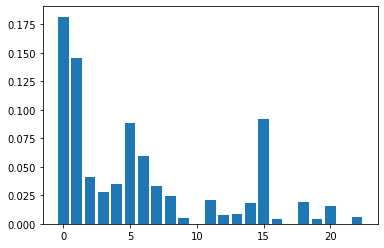

In [ ]:
#setting the feature
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# showing the score
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# visualization
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Ini yang no Temp

In [ ]:
#feature selection
fitur = ["Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
# splitting the test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# showing up the score
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# visualization
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Ini yang no Weather**

In [ ]:
#feature selection
fitur = ["Temperature","Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
# splitting the test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# showing up the score
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# visualization
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Ini yang no Categorical Var**

In [ ]:
#feature selection
fitur = ["Temperature","Hour", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Snowfall","Rainfall"]

x = datafs[fitur]
y = datafs['Count'] #decision attribute
# splitting the test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# showing up the score
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# visualization
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Ini yang no Snow, Friday, Wednesday, Tuesday, Thursday**

Feature 0: 0.167798
Feature 1: 0.151164
Feature 2: 0.033688
Feature 3: 0.017765
Feature 4: 0.033835
Feature 5: 0.084139
Feature 6: 0.058813
Feature 7: 0.026827
Feature 8: 0.017715
Feature 9: 0.018593
Feature 10: 0.011867
Feature 11: 0.013683
Feature 12: 0.005506
Feature 13: 0.015886
Feature 14: 0.101150
Feature 15: 0.009345
Feature 16: 0.000000
Feature 17: 0.000000


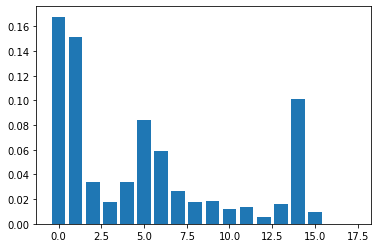

In [ ]:
#feature selection
fitur = ["Hour", "Temperature", "Humidity", "Wind speed ","Visibility ", "Dew point temperature", "Solar Radiation ","Rainfall", "Holiday", "NoFunc","Func","Spring","Autumn","Summer","Winter","Sunday","Monday","Saturday"]
x = datafs[fitur]
y = datafs['Count'] #decision attribute
# splitting the test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# showing up the score
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# visualization
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()